In [39]:
# Importing Relevant Dependencies
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st
import datetime as dt
import numpy as np


cdcPath = "../../../COVID-19_Case_Surveillance_Public_Use_Data.csv"

In [40]:
# Create data frame from CSV file variable(path) using pandas .read_csv() method
cdcDf = pd.read_csv(cdcPath, low_memory=False)

# Print out first 10 rows for inspection
cdcDf.head(10)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
5,2020/11/17,2020/11/10,2020/11/08,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
6,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,Missing,Missing
7,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
8,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Unknown,No,Unknown
9,2020/11/17,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing


In [41]:
# Dropping unnecessary columns
cutCdcDf = cdcDf.drop(['pos_spec_dt', 'onset_dt','icu_yn','death_yn'], axis=1)

In [42]:
# Checking values in Race and Ethnicity to identify possible invalid/missing values 
cdcDf['Race and ethnicity (combined)'].value_counts()

Unknown                                                 2781176
White, Non-Hispanic                                     2599410
Hispanic/Latino                                         1195739
Black, Non-Hispanic                                      736584
Missing                                                  601519
Multiple/Other, Non-Hispanic                             270509
Asian, Non-Hispanic                                      143080
American Indian/Alaska Native, Non-Hispanic               59842
Native Hawaiian/Other Pacific Islander, Non-Hispanic      17213
Name: Race and ethnicity (combined), dtype: int64

In [43]:
# Dropping missing or unknown data using conditional formatting
ethUnkDf = cutCdcDf[(cutCdcDf['Race and ethnicity (combined)'] != 'Missing') &
                    (cutCdcDf['Race and ethnicity (combined)'] != 'Unknown') ]
ethUnkDf.head()

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
3,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes


In [44]:
# Re-Checking values in Race and Ethnicity for conditional formatting accuracy
ethUnkDf['Race and ethnicity (combined)'].value_counts()

White, Non-Hispanic                                     2599410
Hispanic/Latino                                         1195739
Black, Non-Hispanic                                      736584
Multiple/Other, Non-Hispanic                             270509
Asian, Non-Hispanic                                      143080
American Indian/Alaska Native, Non-Hispanic               59842
Native Hawaiian/Other Pacific Islander, Non-Hispanic      17213
Name: Race and ethnicity (combined), dtype: int64

In [45]:
# Checking values in the Age Groups
ethUnkDf['age_group'].value_counts()

20 - 29 Years    951360
30 - 39 Years    799407
40 - 49 Years    742803
50 - 59 Years    727465
60 - 69 Years    531308
10 - 19 Years    503431
70 - 79 Years    316264
80+ Years        254563
0 - 9 Years      185198
Unknown           10507
Name: age_group, dtype: int64

In [46]:
# Dropping unknown values from the age groups
unkAgeDf = ethUnkDf[ethUnkDf['age_group'] != 'Unknown']

# Checking for accuracy (removable)
##unkAgeDf['age_group'].value_counts()
unkAgeDf.head(10)

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
3,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
5,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing
6,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing
7,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing
8,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Unknown
9,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing


In [47]:
# Checking hospitilization values
unkAgeDf['hosp_yn'].value_counts()

No         2591276
Missing    1556663
Unknown     443552
Yes         420386
Name: hosp_yn, dtype: int64

In [48]:
# Dropping missing and unknown values from hospitilization
misHospDf = unkAgeDf[(unkAgeDf['hosp_yn'] != 'Missing') &
                     (unkAgeDf['hosp_yn'] != 'Unknown')]

misHospDf.head(10)

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
6,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing
11,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
13,2020/11/15,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing
14,2020/11/06,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
16,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
23,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes


In [49]:
# Checking values for medical conditions
misHospDf['medcond_yn'].value_counts()

Missing    1811865
Yes         579151
No          459692
Unknown     160954
Name: medcond_yn, dtype: int64

In [50]:
# Dropping missing and unknown values from conditions
misMedDf = misHospDf[(misHospDf['medcond_yn'] != 'Missing') &
                     (misHospDf['medcond_yn'] != 'Unknown')]

misMedDf.head(10)

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
11,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
14,2020/11/06,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
16,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
23,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
29,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
34,2020/11/02,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes


In [51]:
# Checking values in the sex column
misMedDf['sex'].value_counts()

Female     550587
Male       483751
Unknown      3403
Missing      1010
Other          83
Name: sex, dtype: int64

In [52]:
# Removing missing and unknown values from the sex column
misSexDf = misMedDf[(misMedDf['sex'] != 'Missing') &
                    (misMedDf['sex'] != 'Unknown') &
                    (misMedDf['sex'] != 'Other') ]

misSexDf.head()

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
11,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No


In [53]:
# Checking values in the status column
misSexDf['current_status'].value_counts()

Laboratory-confirmed case    991896
Probable Case                 42451
Name: current_status, dtype: int64

In [54]:
# Removing non-laboratory confirmed cases
cleanCdcDf = misSexDf[misSexDf['current_status'] != 'Probable Case']
cleanCdcDf.head(10)

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
11,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
14,2020/11/06,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
16,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
23,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
29,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
34,2020/11/02,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes


In [55]:
# Renaming Column Headers for Visualization and Analyis Purposes
rnCdcDf = cleanCdcDf.rename(columns={"cdc_report_dt": "CDC Report Date",
                                     "current_status": "Covid Status",
                                     "sex": "Gender",
                                     "age_group": "Age Group",
                                     "Race and ethnicity (combined)": "Race/Ethnicity",
                                     "hosp_yn": "Hospitalized",
                                     "medcond_yn": "Pre-Existing Condition"})


sorted_CdcDf = rnCdcDf.sort_values("CDC Report Date", ascending=True)
sorted_CdcDf.head(10)

,CDC Report Date,Covid Status,Gender,Age Group,Race/Ethnicity,Hospitalized,Pre-Existing Condition
6853012,2020/01/01,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",No,Yes
2155067,2020/01/01,Laboratory-confirmed case,Male,40 - 49 Years,"Black, Non-Hispanic",Yes,No
2819969,2020/01/02,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Yes
2554264,2020/01/09,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No
3311685,2020/01/11,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Yes
2272094,2020/01/12,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",Yes,Yes
3199813,2020/01/13,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",Yes,Yes
3781248,2020/01/13,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",No,Yes
3265160,2020/01/15,Laboratory-confirmed case,Male,50 - 59 Years,Hispanic/Latino,No,Yes
3322080,2020/01/16,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Yes


In [56]:
# Reset index and save to new variable
resetCdcDf = sorted_CdcDf.reset_index(drop=True)
resetCdcDf.head(10)

,CDC Report Date,Covid Status,Gender,Age Group,Race/Ethnicity,Hospitalized,Pre-Existing Condition
0,2020/01/01,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",No,Yes
1,2020/01/01,Laboratory-confirmed case,Male,40 - 49 Years,"Black, Non-Hispanic",Yes,No
2,2020/01/02,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Yes
3,2020/01/09,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No
4,2020/01/11,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Yes
5,2020/01/12,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",Yes,Yes
6,2020/01/13,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",Yes,Yes
7,2020/01/13,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",No,Yes
8,2020/01/15,Laboratory-confirmed case,Male,50 - 59 Years,Hispanic/Latino,No,Yes
9,2020/01/16,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Yes


In [57]:
# Convert Date column to correct "date" type
resetCdcDf['CDC Report Date'] = pd.to_datetime(resetCdcDf['CDC Report Date'], format= '%Y/%m/%d')

# Create new column for months of the date for grouping purposes and change to "numerical" type
resetCdcDf['CDC Report Month (#)'] = resetCdcDf['CDC Report Date'].dt.strftime('%m')
resetCdcDf['CDC Report Month (#)'] = pd.to_numeric(resetCdcDf['CDC Report Month (#)'])

# Create bins to aggregate the data into months and use pd.cut() method to bin the data into a new column
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November"]

resetCdcDf['CDC Report Month'] = pd.cut(resetCdcDf['CDC Report Month (#)'], bins, labels=months, include_lowest=False)
resetCdcDf.head()

,CDC Report Date,Covid Status,Gender,Age Group,Race/Ethnicity,Hospitalized,Pre-Existing Condition,CDC Report Month (#),CDC Report Month
0,2020-01-01,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",No,Yes,1,January
1,2020-01-01,Laboratory-confirmed case,Male,40 - 49 Years,"Black, Non-Hispanic",Yes,No,1,January
2,2020-01-02,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Yes,1,January
3,2020-01-09,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No,1,January
4,2020-01-11,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Yes,1,January


In [58]:
# Create variable for refence when calling aggregates by Month
monthCdcDf = resetCdcDf.groupby("CDC Report Month")

# Below is simply an example, you can perform any aggregates youd like 
count_df = monthCdcDf.sum()
count_df['Cases Per Day'] = ""
count_df['Cases Per Day'] = [ round(28/31, 2), round(294/28, 2), round(90843/31, 2),
                             round(332736/30, 2), round(435255/31, 2), round(884196/30, 2),
                             round(1000902/31, 2), round(1028376/31, 2), round(942156/30, 2),
                             round(1423530/31, 2), round(1377959/30, 2) ]
count_df

,CDC Report Month (#),Cases Per Day
CDC Report Month,,
January,28,0.90
February,294,10.50
March,90843,2930.42
April,332736,11091.20
May,435255,14040.48
June,884196,29473.20
July,1000902,32287.16
August,1028376,33173.42
September,942156,31405.20


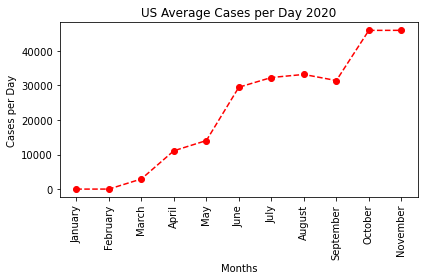

In [61]:
## Create a line graph based on the group series
# Set x-axis and tick locations
x_axis = np.arange(len(months))
tick_locations = [month for month in x_axis]

# Create line chart tracking the change in cases per day thorughout the year
avg_daily = count_df['Cases Per Day']
plt.plot(x_axis, avg_daily, color="red", marker="o", label="Cases per Day", linestyle="dashed")

# Set the labels, axes, and title
plt.xticks(tick_locations, months, rotation="vertical")
plt.title("US Average Cases per Day 2020")
plt.xlabel("Months")
plt.ylabel("Cases per Day")

plt.tight_layout()
plt.show()

In [21]:
# Data Frame Specific to the Analysis of Gender vs. Hospitalization Status
patient_sex_df = resetCdcDf[["Covid Status", "Gender", "Hospitalized"]]
patient_sex_df.head()

,Covid Status,Gender,Hospitalized
0,Laboratory-confirmed case,Female,No
1,Laboratory-confirmed case,Male,Yes
2,Laboratory-confirmed case,Male,No
3,Laboratory-confirmed case,Female,No
4,Laboratory-confirmed case,Male,No


In [22]:
# Data Frame Specific to the Analysis of Age Group vs. Hospitalization Status
patient_age_df = resetCdcDf[["Covid Status", "Gender", "Hospitalized", "Age Group"]]
patient_age_df.head()

,Covid Status,Gender,Hospitalized,Age Group
0,Laboratory-confirmed case,Female,No,60 - 69 Years
1,Laboratory-confirmed case,Male,Yes,40 - 49 Years
2,Laboratory-confirmed case,Male,No,30 - 39 Years
3,Laboratory-confirmed case,Female,No,40 - 49 Years
4,Laboratory-confirmed case,Male,No,60 - 69 Years


In [23]:
# Data Frame Specific to the Analysis of Pre-Exisiting Condition vs. Hospitalization Status
patient_premed_df = resetCdcDf[["Covid Status", "Gender", "Hospitalized",
                             "Age Group", "Pre-Existing Condition"]]
patient_premed_df.head(10)

,Covid Status,Gender,Hospitalized,Age Group,Pre-Existing Condition
0,Laboratory-confirmed case,Female,No,60 - 69 Years,Yes
1,Laboratory-confirmed case,Male,Yes,40 - 49 Years,No
2,Laboratory-confirmed case,Male,No,30 - 39 Years,Yes
3,Laboratory-confirmed case,Female,No,40 - 49 Years,No
4,Laboratory-confirmed case,Male,No,60 - 69 Years,Yes
5,Laboratory-confirmed case,Female,Yes,40 - 49 Years,Yes
6,Laboratory-confirmed case,Male,Yes,50 - 59 Years,Yes
7,Laboratory-confirmed case,Female,No,50 - 59 Years,Yes
8,Laboratory-confirmed case,Male,No,50 - 59 Years,Yes
9,Laboratory-confirmed case,Male,No,60 - 69 Years,Yes
